# **INFORME ESTADÍSTICO: ESTUDIO DE SALARIOS EN EL CAMPO DE DATA SCIENTIST**



*   **JACKELINE ROMERO**
*   **FERNANDO CABRERA**



## **1. ELECCIÓN DE DATOS Y BREVE DESCRIPCIÓN DE SU NATURALEZA**

La fuente del conjunto de datos utilizado en este estudio es Kaggle. Ellos mismos describen su web como: "Una plataforma web que reúne la comunidad Data Science más grande del mundo, con más de 536 mil miembros activos en 194 países, recibe más de 150 mil publicaciones por mes, que brindan todas las herramientas y recursos más importantes para progresar al máximo en data science"
<br>
Es precisamente en el campo de Data Science y el rol de Data Scientist donde centramos nuestro estudio. El dataset seleccionado ofrece información detallada sobre salarios en función de características demográficas, educación y niveles de experiencia. La selección se basa tanto en nuestro interés personal y profesional, como futuros Data Scientis o Data Analyst, como en la estructura de la base de datos que nos permitirá aplicar los contenidos impartidos en las diferentes sesiones de la materia.
<br>
<br>
**DESCRIPCIÓN DEL CONJUNTO DE DATOS**
<br>

El conjunto de datos proporciona información sobre las tendencias salariales dentro del campo de Data Science en varias industrias, ubicaciones, niveles de experiencia y roles laborales. El tamaño del conjunto de datos es de 607 entradas de salarios por usuario.
<br><br>
Incluye la siguiente información:

**id:** Indica el número de ID asignado a cada usuario. Los números ID van del 0 al 606.

**work_year:** Indica el año al que hace referencia la información. (2020, 2021 o 2022)

**experience_level:** Información sobre el nivel de experiencia de los usuarios de cada rol.

*Cuatro niveles de experiencia:*

*   **EN:** Entry Level
*   **MI:** Mid Level
*   **SE:** Senior Level
*   **EX:** Executive Level


**employment_type:** Indica el tipo de contrato al que hace referencia el salario. Por ejemplo, FT es "full time".

*Cuatro tipos de contrato:*

* **FT:** Full Time
* **PT:** Part Time
* **CT:** Contract basis
* **FL:** Freelancer

**job_title:** Indica el puesto o rol específico dentro del campo de Data Science, como Data Scientist, Data Analyst, Machine Learning Engineer, etc.

**salary:** Valores numéricos que representan el salario anual o mensual para cada posición. (el salario está en la moneda original del país de la empresa)

**salary_currency:** Indica la moneda en la que se recibe el salario específico.

**salary_in_usd:** El valor del salario convertido a la moneda USD para tener una lectura uniforme de salarios sin tener en cuenta su moneda original

**employee_residence:** Indica el país de residencia del empleado. En este caso, no tiene porqué coincdir con el país de la compñaía, ya que existe la opción de trabajar en remoto.

**remote_ratio:** Indica el porcentaje de horas que el empleado puede teletrabajar.

*Existen 3 formatos de teletrabajo:*

* **0:** 100% presencial
* **50:** 50% remoto
* **100:** 100% remoto

**company_location:** País en el que se ubica la empresa de la que proviene el salario concreto. El país se espcifica con el código ISO 3166-1 internacional. Por ejemplo; Japón será JP.

**company_size:** Tamaño de la empresa en función de su número de empleados.

*Hay 3 tamaños de empresa:*

* **L:** Gran empresa
* **M:** Mediana empresa
* **S:** Pequeña empresa








### Carga y visualización de los datos

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats as stats
from tabulate import tabulate
from scipy.stats import norm, expon, gamma, kstest

salariesdf = pd.read_csv("ds_salaries.csv")

#print(tabulate(salariesdf.head(20), headers='keys', tablefmt='fancy_grid'))

In [3]:
top_jobs = [
    "Data Scientist",
    "Data Engineer",
    "Data Analyst",
    "Machine Learning Engineer",
    "Research Scientist",
    "Data Science Manager",
    "Data Architect"
]

salariesdf['job_title'] = salariesdf['job_title'].apply(lambda x: x if x in top_jobs else 'Otro')


print(tabulate(salariesdf.head(10), headers='keys', tablefmt='fancy_grid'))

╒════╤══════╤═════════════╤════════════════════╤═══════════════════╤═══════════════════════════╤══════════╤═══════════════════╤═════════════════╤══════════════════════╤════════════════╤════════════════════╤════════════════╕
│    │   id │   work_year │ experience_level   │ employment_type   │ job_title                 │   salary │ salary_currency   │   salary_in_usd │ employee_residence   │   remote_ratio │ company_location   │ company_size   │
╞════╪══════╪═════════════╪════════════════════╪═══════════════════╪═══════════════════════════╪══════════╪═══════════════════╪═════════════════╪══════════════════════╪════════════════╪════════════════════╪════════════════╡
│  0 │    0 │        2020 │ MI                 │ FT                │ Data Scientist            │    70000 │ EUR               │           79833 │ DE                   │              0 │ DE                 │ L              │
├────┼──────┼─────────────┼────────────────────┼───────────────────┼───────────────────────────┼────────

### Agrupamos todos los puestos con menos de 10 entradas en la categoría "Otro" para poder hacer un análisis más adecuado.

In [4]:
job_title_counts = salariesdf['job_title'].value_counts()

print(job_title_counts)

Otro                         155
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Data Science Manager          12
Data Architect                11
Name: job_title, dtype: int64


### Estadísticas descriptivas.


In [12]:
salariesdf.describe()

,id,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000




## **2. DESCRIPTIVA UNIVARIANTE Y BIVARIANTE DE LOS DATOS**



### **DESCRIPTIVA UNIVARIANTE**

**MEDIA DE SALARIO POR NIVEL DE EXPERIENCIA**

---


<br>Muestra la media del salario para cada nivel de experiencia.
Proporciona una comparación visual de cómo varía el salario en función del nivel de experiencia.
El eje X representa los diferentes niveles de experiencia, mientras que el eje Y muestra el salario medio en USD.

<ipython-input-11-f139cb60627d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_salary_by_experience.index, y=mean_salary_by_experience.values, palette='viridis')


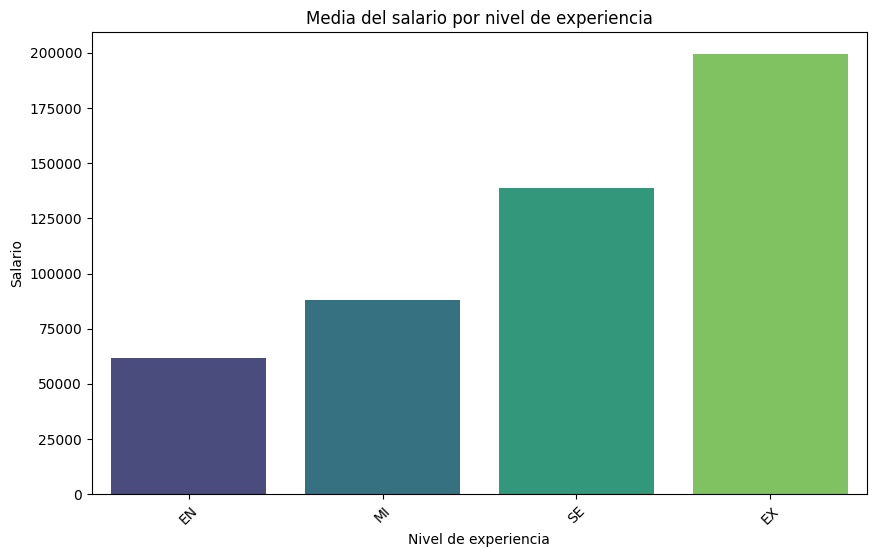

In [11]:

order_experience_level = ['EN', 'MI', 'SE', 'EX']

salariesdf['experience_level_ordered'] = pd.Categorical(salariesdf['experience_level'], categories=order_experience_level, ordered=True)

mean_salary_by_experience = salariesdf.groupby('experience_level_ordered')['salary_in_usd'].mean()

#print(mean_salary_by_experience)

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_salary_by_experience.index, y=mean_salary_by_experience.values, palette='viridis')
plt.title('Media del salario por nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario')
plt.xticks(rotation=45)
plt.show()

**Comentario**
<br>Estos resultados muestran una clara tendencia de aumento en el salario medio a medida que aumenta el nivel de experiencia. Los empleados con más experiencia tienden a tener salarios más altos, mientras que aquellos en los niveles de entrada tienen los salarios más bajos. Esta información proporciona una comprensión útil de cómo varía el salario en función del nivel de experiencia.







**HISTOGRAMA DE DISTRIBUCIÓN DE SALARIOS**

---

<br>Muestra la distribución de los salarios en el dataset.
Permite visualizar la frecuencia de los distintos rangos de salario.
El eje x representa el salario en USD, mientras que el eje y muestra la frecuencia o cantidad de empleados que reciben ese salario.
La línea suave que atraviesa el histograma es una estimación de la densidad de la distribución (KDE), que proporciona una idea de la forma de la distribución de los salarios.



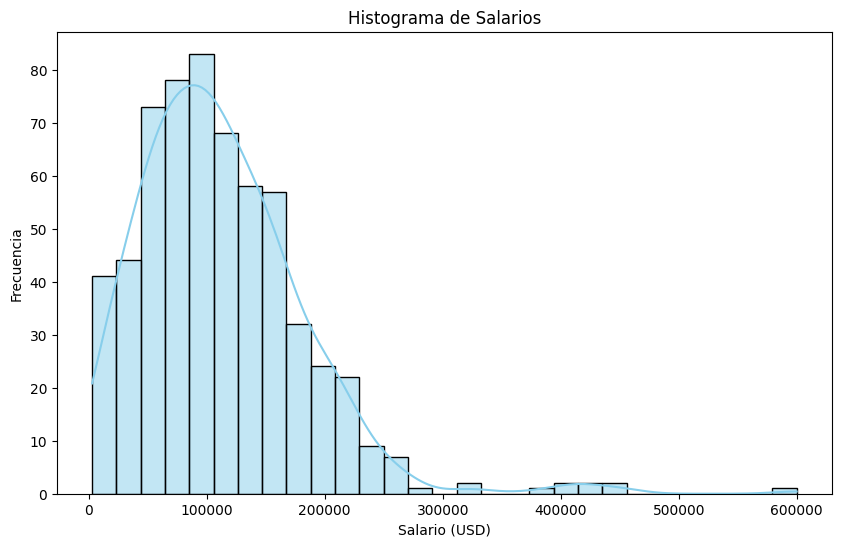

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el histograma con seaborn
sns.histplot(salariesdf['salary_in_usd'], kde=True, color='skyblue')

# Agregar título y etiquetas de los ejes
plt.title('Histograma de Salarios')
plt.xlabel('Salario (USD)')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


**Comentario**
<br>El histograma proporciona una representación visual de la distribución de los salarios en el dataset. Se observa una forma prácticamente normal en la distribución, con un punto medio alrededor de $100,000. Esto sugiere que la mayoría de los empleados reciben salarios dentro de ese rango. La estimación de densidad (KDE) resalta esta tendencia, mostrando un pico alrededor del punto medio.







**MEDIA DE SALARIO POR PUESTO DE TRABAJO**

---


<ipython-input-5-be1d5a2db1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_salary_by_job_title.index, y=mean_salary_by_job_title.values, palette='viridis')


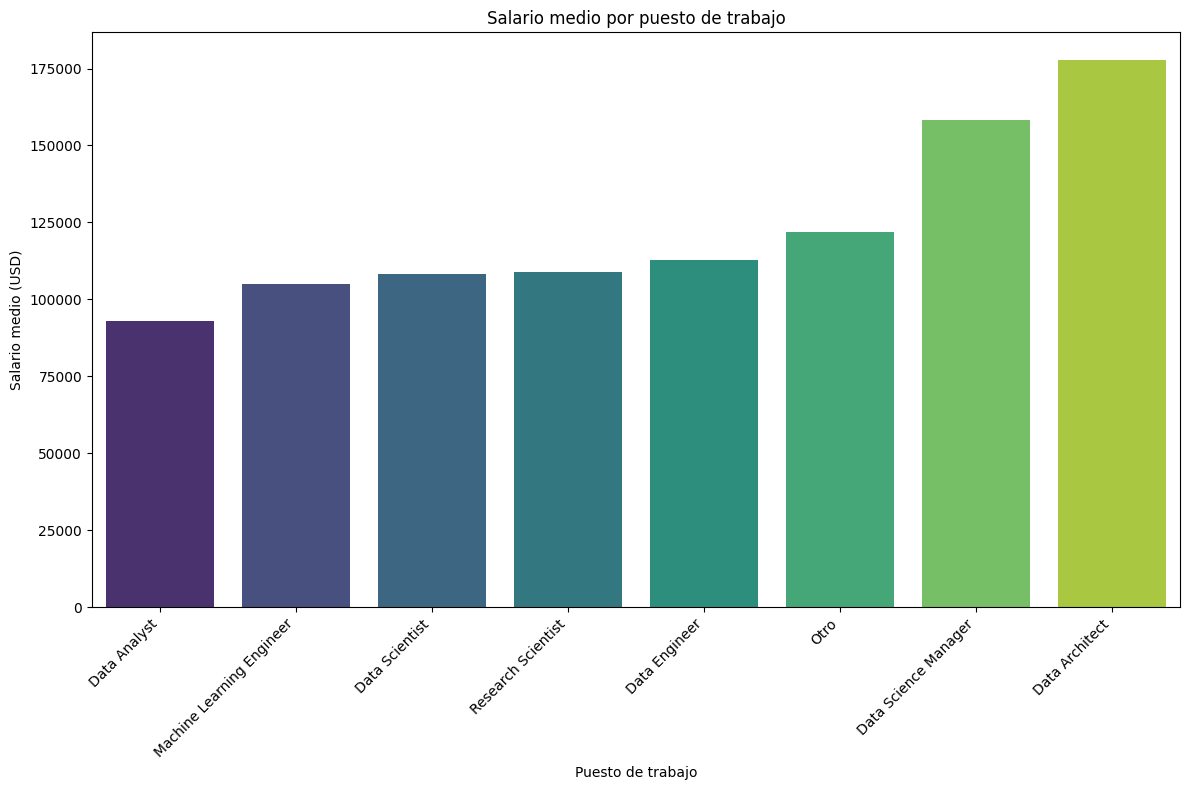

In [ ]:
mean_salary_by_job_title = salariesdf.groupby('job_title')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=mean_salary_by_job_title.index, y=mean_salary_by_job_title.values, palette='viridis')
plt.title('Salario medio por puesto de trabajo')
plt.xlabel('Puesto de trabajo')
plt.ylabel('Salario medio (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Comentario:**

Podemos observar que el perfil con una menor remuneración es "Data Analyst" mientras que perfiles orientados a la gestión, tales como "Data Science Manager" se encuentran en el top 3. Sin embargo, podemos observar claramente a través del gráfico de barras que perfiles técnicos como "Data Architect" son los más afortunados salarialmente.

**MEDIA DE SALARIO POR LUGAR DE RESIDENCIA**

---


<ipython-input-34-af4a6a4b3425>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_salario_por_residencia, x='employee_residence', y='salary_in_usd', palette='viridis')


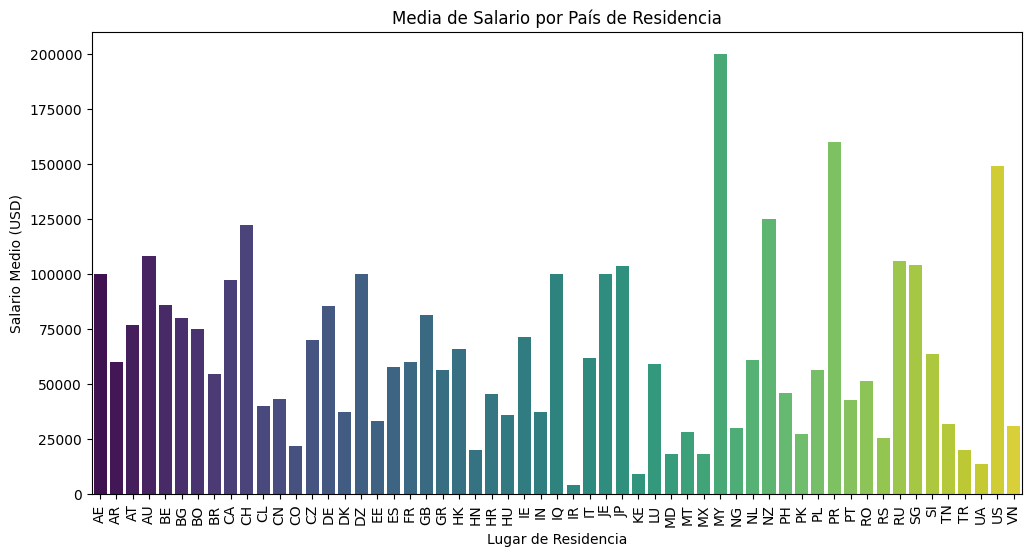

In [34]:
media_salario_por_residencia = salariesdf.groupby('employee_residence')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(data=media_salario_por_residencia, x='employee_residence', y='salary_in_usd', palette='viridis')

plt.title('Media de Salario por País de Residencia')
plt.xlabel('Lugar de Residencia')
plt.ylabel('Salario Medio (USD)')

plt.xticks(rotation=90)

plt.show()


**TOP 10 SALARIOS POR LUGAR DE RESIDENCIA**

---


<ipython-input-39-409f98cc1e68>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_lugares_residencia, x='employee_residence', y='salary_in_usd', palette='viridis')


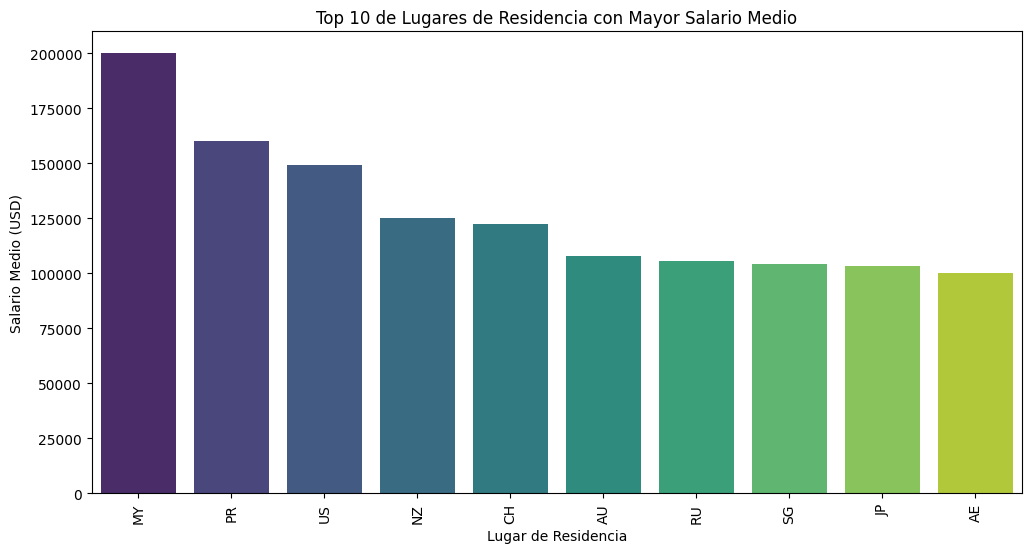

In [39]:
media_salario_por_residencia_sorted = media_salario_por_residencia.sort_values(by='salary_in_usd', ascending=False)

top_10_lugares_residencia = media_salario_por_residencia_sorted.head(10)

plt.figure(figsize=(12, 6))

sns.barplot(data=top_10_lugares_residencia, x='employee_residence', y='salary_in_usd', palette='viridis')

plt.title('Top 10 de Lugares de Residencia con Mayor Salario Medio')
plt.xlabel('Lugar de Residencia')
plt.ylabel('Salario Medio (USD)')

plt.xticks(rotation=90)

plt.show()


### **DESCRIPTIVA BIVARIANTE**


**BOXPLOT DE SALARIOS POR PUESTO Y AÑO**

---
<br>Muestra la distribución de los salarios en función del puesto de trabajo y el año.
Permite comparar visualmente cómo varían los salarios entre diferentes puestos de trabajo a lo largo del tiempo.
Los diagramas de caja muestran la mediana, los cuartiles y los valores atípicos de los salarios para cada combinación de puesto y año.



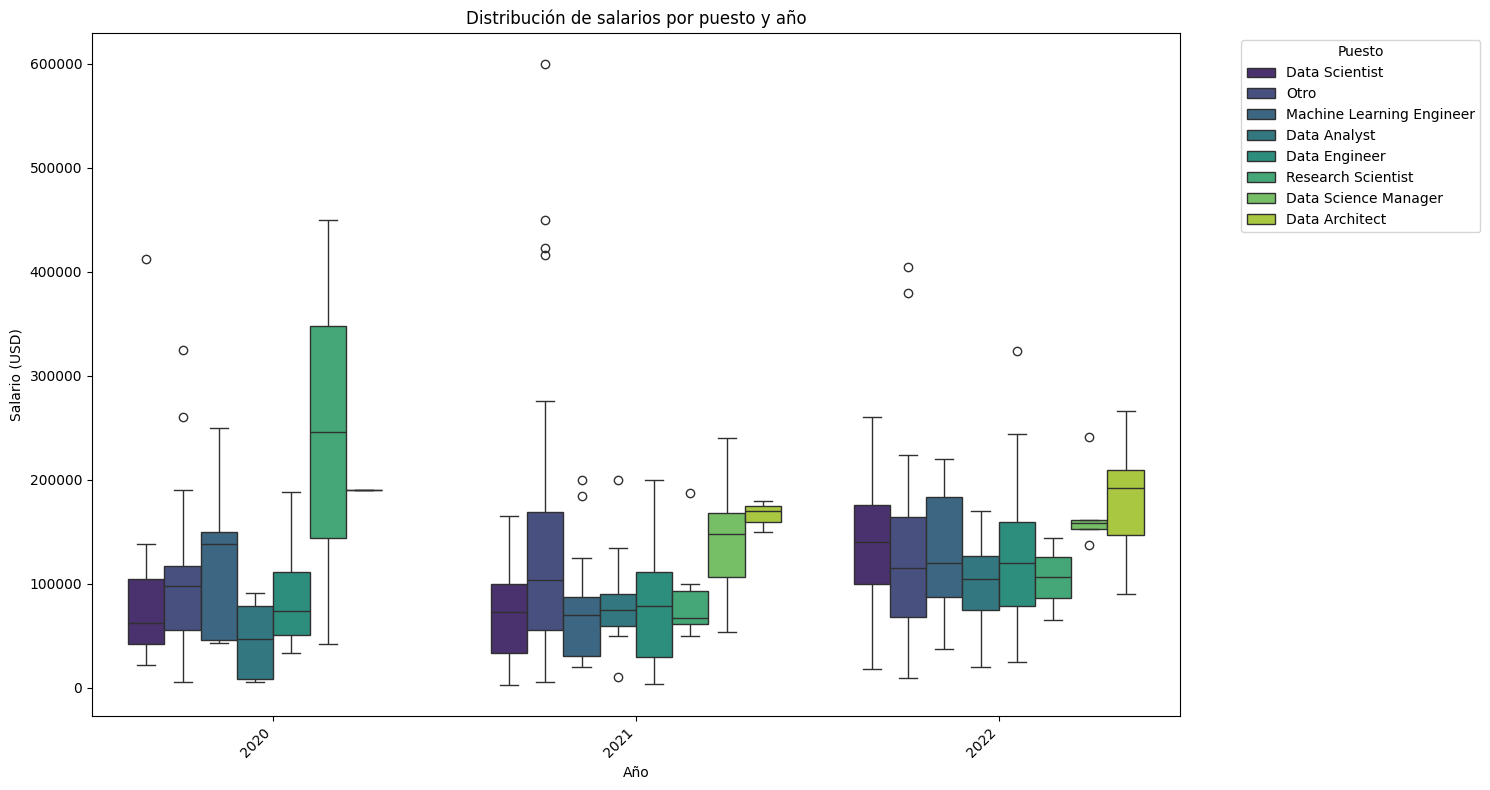

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=salariesdf, x='work_year', y='salary_in_usd', hue='job_title', palette='viridis')
plt.title('Distribución de salarios por puesto y año')
plt.xlabel('Año')
plt.ylabel('Salario (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Puesto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Comentario:**

Podemos observar las distribuciones de salarios en función de los años 2020, 2021 y 2022.

En primer lugar, sabemos que durante el año 2020, no existían perfiles con la denominación de "Data Architect" y a penas habían "Data Science Manager".

Además, en el 2020 abundaban más perfiles "Research Scientist" y eran los mejor remunerados, lo cual puede estar relacionado con una época influencia por una pandemia (covid-19).

Finalmente, tanto en el 2021 como en el 2022 podemos ver que la media de salarios más alta es la correspondiente a los "Data Architect" y que de manera generalizada, durante ese último año las medias salariales aumentaron para todos los perfiles en comparación con el 2021.


**MEDIA DE SALARIOS POR TAMAÑO DE EMPRESA Y NIVEL DE EXPERIENCIA**

---

Muestra la media de los salarios para cada combinación de tamaño de empresa y nivel de experiencia.
Permite comparar visualmente cómo varían los salarios según el tamaño de la empresa y el nivel de experiencia.
Los datos se muestran mediante barras agrupadas según el nivel de experiencia, y cada barra se divide según el tamaño de la empresa.

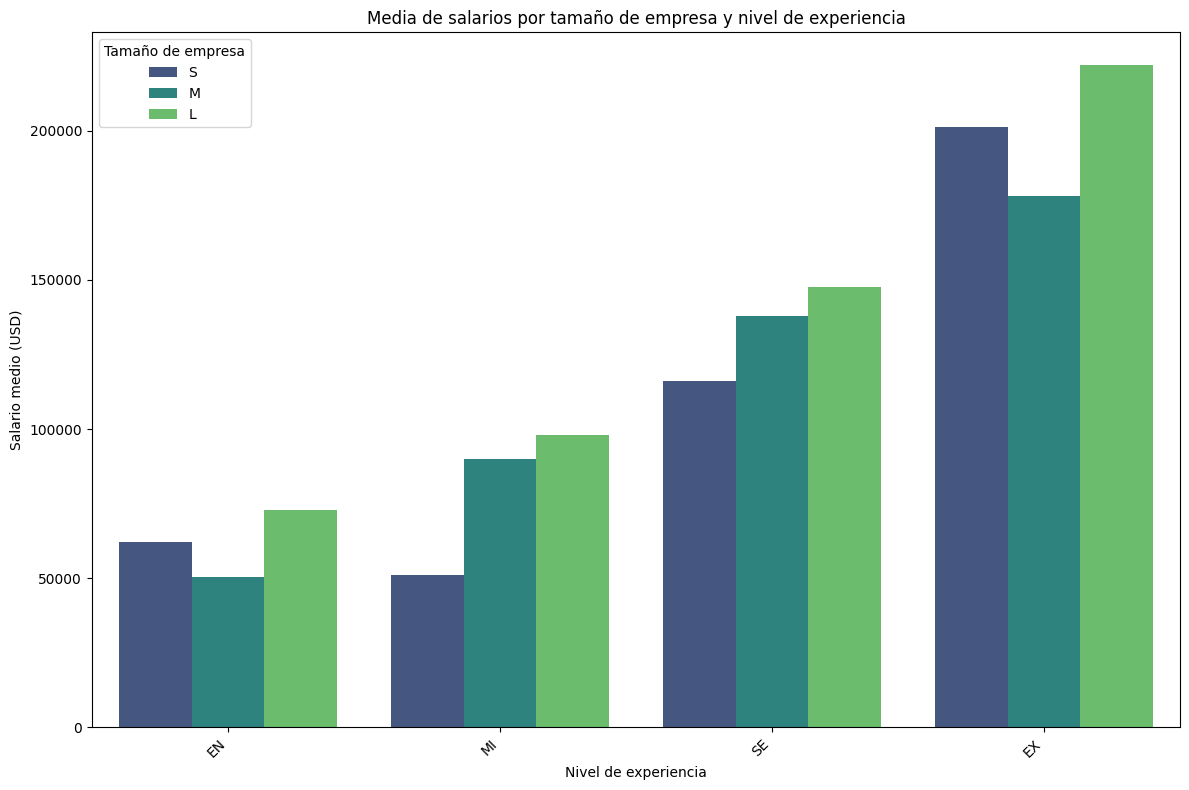

In [6]:

order_experience_level = ['EN', 'MI', 'SE', 'EX']

order_company_size = ['S', 'M', 'L']

salariesdf['experience_level_ordered'] = pd.Categorical(salariesdf['experience_level'], categories=order_experience_level, ordered=True)
salariesdf['company_size_ordered'] = pd.Categorical(salariesdf['company_size'], categories=order_company_size, ordered=True)

mean_salary_by_size_and_experience = salariesdf.groupby(['company_size_ordered', 'experience_level_ordered'])['salary_in_usd'].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(data=mean_salary_by_size_and_experience, x='experience_level_ordered', y='salary_in_usd', hue='company_size_ordered', palette='viridis')
plt.title('Media de salarios por tamaño de empresa y nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario medio (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Tamaño de empresa')
plt.show()

**Comentario:**

Los salarios medios más altos se encuentran en las organizaciones más grandes para todos los niveles de experiencia. Con un nivel "Middle" o "Senior" el salario medio aumenta y está directamente relacionado con el tamaño de la organización a la que perteneces, Sin embargo, podemos observar que tanto en el nivel "Entry" como "Executive" la media salarial es mayor en las empresas más pequeñas que en las medianas.


## **3. COMPROBACIÓN DE LA NORMALIDAD DE ALGUNAS VARIABLES DEL CONJUNTO DE DATOS.**

**GRÁFICO DE DENSIDAD(KDE) DE LA DISTRIBUCIÓN DE LOS SALARIOS.**

---
<br>Visualización de la distribución de los salarios con el salario en USD en el eje X y la densidad en el eje Y.

<ipython-input-8-7da107e2d558>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(salariesdf['salary_in_usd'], color='skyblue', shade=True)


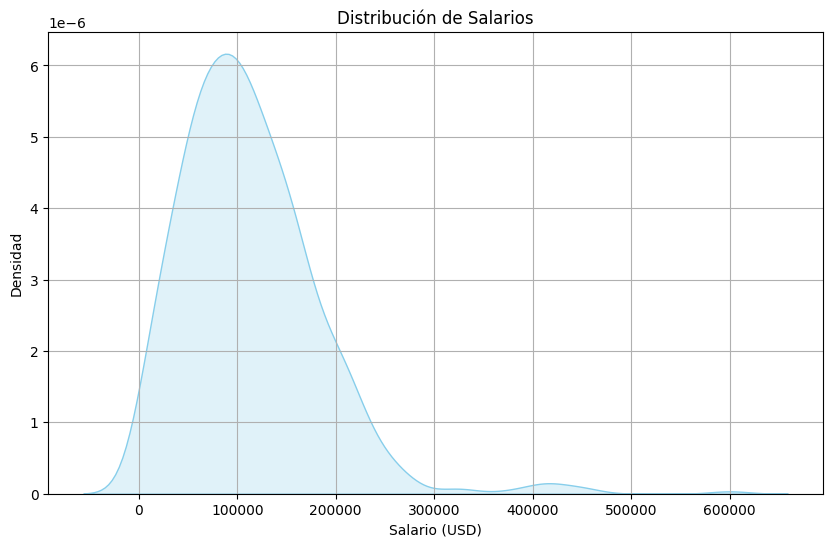

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(salariesdf['salary_in_usd'], color='skyblue', shade=True)
plt.title('Distribución de Salarios')
plt.xlabel('Salario (USD)')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

**¿QUÉ DISTRIBUCIÓN TIENEN NUESTROS DATOS?**

---



In [ ]:
salarios_usd = salariesdf['salary_in_usd'].dropna()

distribuciones = [stats.norm, stats.chi2, stats.t, stats.f, stats.expon, stats.gamma]
aic_values = {}
for dist in distribuciones:
    if dist == stats.beta:
        continue
    params = dist.fit(salarios_usd)
    log_likelihood = dist.logpdf(salarios_usd, *params).sum()
    num_params = len(params)
    aic = 2 * num_params - 2 * log_likelihood
    aic_values[dist.name] = aic

print("Valores AIC para cada distribución:")
for dist_name, aic in aic_values.items():
    print(f"{dist_name}: {aic}")

mejor_distribucion = min(aic_values, key=aic_values.get)
print(f"\nLa distribución que sigue la variable salario es: {mejor_distribucion}")


Valores AIC para cada distribución:
norm: 15285.767810173764
chi2: 15252.203960338193
t: 15211.932749410098
f: 15532.948511616643
expon: 15304.189387073204
gamma: 15171.487397039731

La distribución que sigue la variable salario es: gamma


En cuanto al ejercicio, nos aparece que nuestra distribución que sigue la variable salario es la gamma, pero si tenemos en cuenta el gráfico de densidad realizado inicialmente y teniendo en cuenta que estamos hablando de una variable como "salario", podemos indicar que la distribución que sigue dicha variable es la t.

In [ ]:
salarios_usd = salariesdf['salary_in_usd'].dropna()


distribuciones = [stats.norm, stats.chi2, stats.t, stats.f, stats.expon]
aic_values = {}
for dist in distribuciones:
    if dist == stats.beta:
        continue
    params = dist.fit(salarios_usd)
    log_likelihood = dist.logpdf(salarios_usd, *params).sum()
    num_params = len(params)
    aic = 2 * num_params - 2 * log_likelihood
    aic_values[dist.name] = aic

print("Valores AIC para cada distribución:")
for dist_name, aic in aic_values.items():
    print(f"{dist_name}: {aic}")

mejor_distribucion = min(aic_values, key=aic_values.get)
print(f"\nLa distribución que sigue la variable salario es: {mejor_distribucion}")

Valores AIC para cada distribución:
norm: 15285.767810173764
chi2: 15252.203960338193
t: 15211.932749410098
f: 15532.948511616643
expon: 15304.189387073204

La distribución que sigue la variable salario es: t


**DISTRIBUCIÓN DE SALARIO POR NIVEL DE EXPERIENCIA**

---



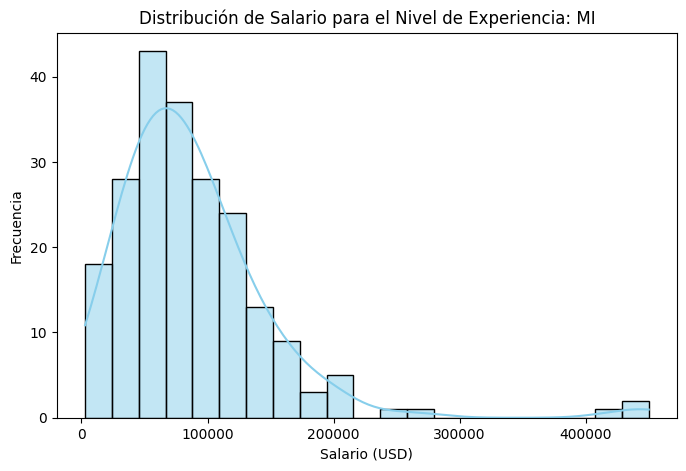

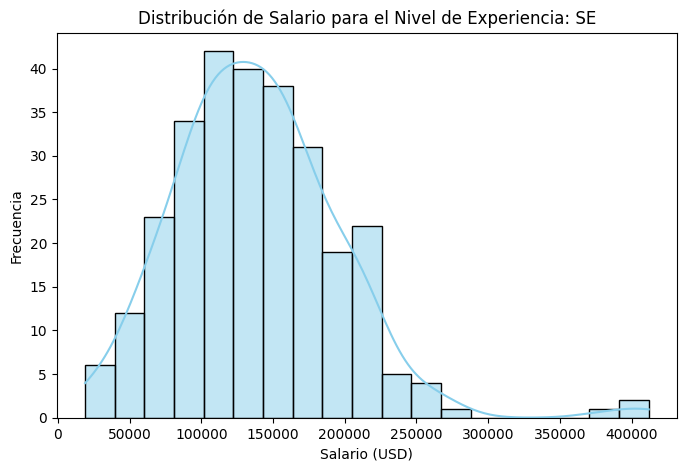

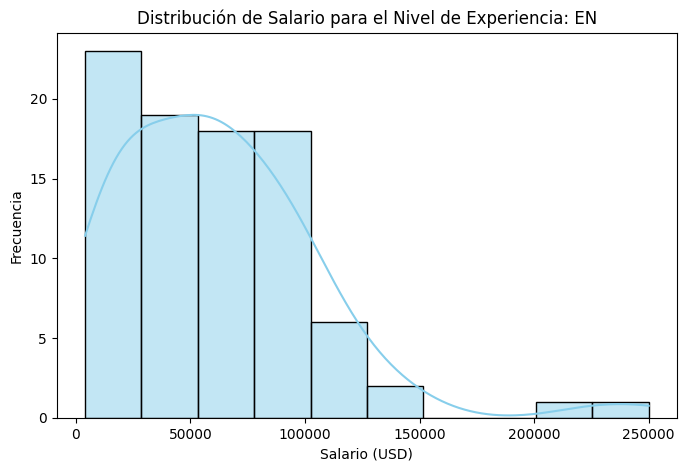

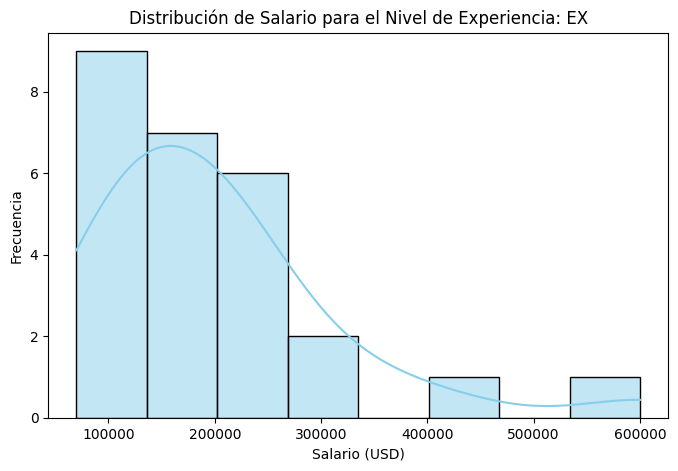

In [ ]:
levels = salariesdf['experience_level'].unique()
for level in levels:
    subset = salariesdf[salariesdf['experience_level'] == level]

    plt.figure(figsize=(8, 5))
    sns.histplot(subset['salary_in_usd'], kde=True, color='skyblue')
    plt.title(f'Distribución de Salario para el Nivel de Experiencia: {level}')
    plt.xlabel('Salario (USD)')
    plt.ylabel('Frecuencia')
    plt.show()

Podemos ver que tanto en el nivel de experiencia "Middle" como "Senior" tenemos muestra representativa para poder plantear ciertas hipótesis, sin embargo para los otros niveles de experiencia(EX y EN) no disponemos de suficientes datos.

**SALARIO MEDIO POR NIVEL DE EXPERIENCIA (MIDDLE Y SENIOR)**

---



In [7]:
salario_medio_MI = salariesdf[salariesdf['experience_level'] == 'MI']['salary_in_usd'].mean()

salario_medio_SE = salariesdf[salariesdf['experience_level'] == 'SE']['salary_in_usd'].mean()

print("Salario medio de un empleado con experiencia MI:", salario_medio_MI)
print("Salario medio de un empleado con experiencia SE:", salario_medio_SE)

Salario medio de un empleado con experiencia MI: 87996.05633802817
Salario medio de un empleado con experiencia SE: 138617.29285714286


## **4. ESTIMACIÓN PUNTUAL Y POR INTERVALOS DE LOS PARÁMETROS POBLACIONALES DE ALGUNAS VARIABLES.**

*   Calculamos la media y la desviación estándar de los salarios totales.

*   Estimamos intervalos de confianza para la media de los salarios, tanto globalmente como por nivel de experiencia.
*   Con esto podemos alcanzar una comprensión de la precisión de las estimaciones de los parámetros poblacionales de los salarios.

In [ ]:
salario_medio_total = salariesdf['salary_in_usd'].mean()

print("Salario medio total:", salario_medio_total,"$")

desviacion_tipica = np.std(salariesdf['salary_in_usd'])

print("Desviación estándar:", desviacion_tipica)

Salario medio total: 112297.86985172982 $
Desviación estándar: 70898.78617574446


In [ ]:
import scipy.stats as stats


stats.t.interval(confidence = 0.95,              # Confidence level
                 df= 606,                    # Degrees of freedom
                 loc = salario_medio_total,         # Sample mean
                 scale = desviacion_tipica)             # Standard deviation estimate

(-26939.286481552306, 251535.02618501196)

Finalmente, al estar hablando de salarios nuestro intervalo de confianza sería el siguiente:

**(0, 251535.02618501196)**

## **5. REALIZACIÓN DE CONTRASTES DE HIPÓTESIS OPORTUNOS PARA REALIZAR INFERENCIA CON LOS DATOS.**

**CONTRASTE DE HIPÓTESIS UTILIZANDO EL TEST T DE WELCH PARA COMPARAR LOS SALARIOS MEDIOS ENTRE LOS NIVELES DE EXPERIENCIA MIDDLE Y SENIOR**

---



In [ ]:
salario_MI = salariesdf[salariesdf['experience_level'] == 'MI']['salary_in_usd']
salario_SE = salariesdf[salariesdf['experience_level'] == 'SE']['salary_in_usd']

# Realizar el test t de Welch
statistic, pvalue = stats.ttest_ind(a=salario_MI, b=salario_SE, equal_var=False)

nivel_significancia = 0.05

print("Estadístico de Prueba:", statistic)
print("Valor p:", pvalue)

if pvalue < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay una diferencia significativa en los salarios medios entre los niveles de experiencia Middle y Senior.")
else:
    print("No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que exista una diferencia significativa en los salarios medios entre los niveles de experiencia Middle y Senior.")


Estadístico de Prueba: -9.083400288269177
Valor p: 3.841756601591662e-18
Se rechaza la hipótesis nula. Hay una diferencia significativa en los salarios medios entre los niveles de experiencia Middle y Senior.


**¿EXISTEN DIFERENCIAS SIGNIFICATIVAS EN EL SALARIO EN FUNCIÓN DEL NIVEL DE EXPERIENCIA: MEDIA O SENIOR? - TEST T DE STUDENT**

---



In [ ]:
salario_MI = salariesdf[salariesdf['experience_level'] == 'MI']['salary_in_usd']
salario_SE = salariesdf[salariesdf['experience_level'] == 'SE']['salary_in_usd']

stats.ttest_ind(a= salario_MI,
                b= salario_SE,
                equal_var=False)

TtestResult(statistic=-9.083400288269177, pvalue=3.841756601591662e-18, df=430.6133490509903)

Teniendo en cuenta el valor de p, el cual es inferior a 0.05, podemos rechazar la hipótesis nula, lo que sugiere que la **diferencia en los salarios entre los grupos 'MI' y 'SE' es estadísticamente significativa**.

In [ ]:
stats.ttest_ind(a= salario_MI,
                b= salario_SE,
                equal_var=False, alternative='less')

TtestResult(statistic=-9.083400288269177, pvalue=1.920878300795831e-18, df=430.6133490509903)

Realizamos otro test t de Student para comparar la media de los dos grupos. En este caso, añadiendo el argumento "less" el cual indica que la hipótesis alternativa considerada es que la media del primer grupo (salario_MI) es menor que la media del segundo grupo (salario_SE).

Teniendo en cuenta el valor de p, inferior a 0,05, confirmamos que la media de los salarios de los empleados con nivel de experiencia 'MI' es significativamente menor que la media de los salarios de los empleados con nivel de experiencia 'SE'.

**¿CUÁL ES LA PROBABILIDAD DE QUE EL SALARIO DE UN/A EMPLEADO/A SEA SUPERIOR A LA MEDIA?**

---



In [16]:
# Calcular la probabilidad de que un empleado MI cobre más que el salario medio
probabilidad_mas_de_la_media_MI = (salariesdf[(salariesdf['experience_level'] == 'MI') &
                                             (salariesdf['salary_in_usd'] > salario_medio_MI)].shape[0] /
                                   salariesdf[salariesdf['experience_level'] == 'MI'].shape[0] * 100)

# Calcular la probabilidad de que un empleado SE cobre más que el salario medio
probabilidad_mas_de_la_media_SE = (salariesdf[(salariesdf['experience_level'] == 'SE') &
                                             (salariesdf['salary_in_usd'] > salario_medio_SE)].shape[0] /
                                   salariesdf[salariesdf['experience_level'] == 'SE'].shape[0] * 100)

print("Probabilidad de que un empleado MI cobre más que el salario medio:", probabilidad_mas_de_la_media_MI, "%")
print("Probabilidad de que un empleado SE cobre más que el salario medio:", probabilidad_mas_de_la_media_SE, "%")

Probabilidad de que un empleado MI cobre más que el salario medio: 40.845070422535215 %
Probabilidad de que un empleado SE cobre más que el salario medio: 47.85714285714286 %


**¿CUÁL ES LA PROBABILIDAD DE QUE UN/A EMPLEADO/A DE NIVEL SENIOR COBRE MÁS DE 200K AL AÑO?**

---


In [ ]:
probabilidad_SE_mayor_200k = (salariesdf[(salariesdf['experience_level'] == 'SE') &
                                         (salariesdf['salary_in_usd'] > 200000)].shape[0] /
                              salariesdf[salariesdf['experience_level'] == 'SE'].shape[0] * 100)

print("Probabilidad de que un empleado SE cobre más de 200k:", probabilidad_SE_mayor_200k, "%")

Probabilidad de que un empleado SE cobre más de 200k: 12.857142857142856 %


**INTERVALOS DE CONFIANZA EN FUNCIÓN DEL NIVEL DE EXPERIENCIA**

---


In [25]:
salario_counts = salariesdf['experience_level'].value_counts()

print(salario_counts)

salarios_MI = salariesdf[salariesdf['experience_level'] == 'MI']['salary_in_usd']

salarios_SE = salariesdf[salariesdf['experience_level'] == 'SE']['salary_in_usd']

desviacion_tipica_MI = np.std(salarios_MI)
desviacion_tipica_SE = np.std(salarios_SE)

print("Desviación estándar para empleados con nivel de experiencia MI:", desviacion_tipica_MI)
print("Desviación estándar para empleados con nivel de experiencia SE:", desviacion_tipica_SE)

# Tamaño de la muestra p
n_MI = len(salarios_MI)
n_SE = len(salarios_SE)

# Grados de libertad
df_MI = n_MI - 1
df_SE = n_SE - 1

# Nivel de confianza
confianza = 0.95

# Cálculo de los intervalos de confianza para la media utilizando la distribución t de Student
intervalo_confianza_MI = stats.t.interval(confianza, df_MI, loc=np.mean(salarios_MI), scale=desviacion_tipica_MI / np.sqrt(n_MI))
intervalo_confianza_SE = stats.t.interval(confianza, df_SE, loc=np.mean(salarios_SE), scale=desviacion_tipica_SE / np.sqrt(n_SE))

print("Intervalo de confianza para empleados con nivel de experiencia MI:", intervalo_confianza_MI)
print("Intervalo de confianza para empleados con nivel de experiencia SE:", intervalo_confianza_SE)


SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
Desviación estándar para empleados con nivel de experiencia MI: 63750.87852169495
Desviación estándar para empleados con nivel de experiencia SE: 57588.864799542185
Intervalo de confianza para empleados con nivel de experiencia MI: (79385.50796469464, 96606.6047113617)
Intervalo de confianza para empleados con nivel de experiencia SE: (131842.50639567734, 145392.0793186084)


**VISUALIZACIÓN DE LA DISTRIBUCIÓN DE SALARIOS POR PUESTO Y NIVEL DE EXPERIENCIA**

---



Visualizamos la distribución de los salarios por nivel de experiencia utilizando boxplots, proporcionando una comparación adicional de los salarios entre los diferentes niveles de experiencia.



<ipython-input-26-5afcea3c9687>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=salariesdf, x='experience_level_ordered', y='salary_in_usd', palette='viridis')


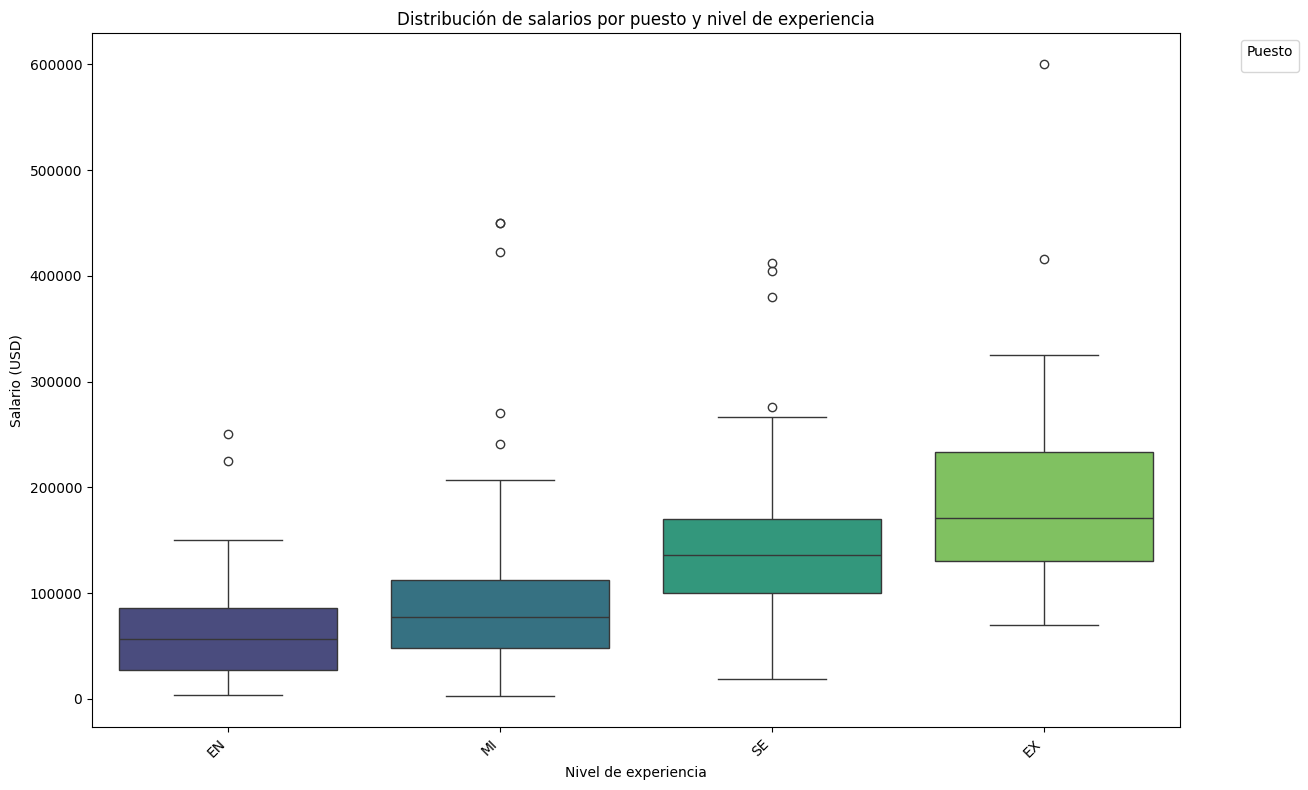

In [26]:
order_experience_level = ['EN', 'MI', 'SE', 'EX']

salariesdf['experience_level_ordered'] = pd.Categorical(salariesdf['experience_level'], categories=order_experience_level, ordered=True)

plt.figure(figsize=(12, 8))
sns.boxplot(data=salariesdf, x='experience_level_ordered', y='salary_in_usd', palette='viridis')
plt.title('Distribución de salarios por puesto y nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Puesto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **6. REALIZACIÓN DE ANOVA (ANÁLISIS DE VARIANZA).**

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ajustar el modelo ANOVA
modelo_anova = ols('salary_in_usd ~ experience_level', data=salariesdf).fit()

# Realizar el ANOVA
tabla_anova = sm.stats.anova_lm(modelo_anova, typ=2)

print(tabla_anova)


                        sum_sq     df          F        PR(>F)
experience_level  7.427705e+11    3.0  64.675515  2.881847e-36
Residual          2.308399e+12  603.0        NaN           NaN


El valor p es extremadamente pequeño **(2.881847e-36)**, lo que indica que hay una diferencia significativa entre al menos dos de los niveles de experiencia en términos de salario.



In [30]:
modelo_anova2 = ols('salary_in_usd ~ company_size', data=salariesdf).fit()

# Realizar el ANOVA
tabla_anova2 = sm.stats.anova_lm(modelo_anova2, typ=2)

print(tabla_anova2)

                    sum_sq     df          F    PR(>F)
company_size  1.162105e+11    2.0  11.957777  0.000008
Residual      2.934959e+12  604.0        NaN       NaN


El valor p es extremadamente pequeño **(0.000008)**, lo que indica que hay una diferencia significativa en los salarios entre al menos dos de los tamaños de empresa.

In [32]:
modelo_anova3 = ols('salary_in_usd ~ employee_residence', data=salariesdf).fit()

# Realizar el ANOVA
tabla_anova3 = sm.stats.anova_lm(modelo_anova3, typ=2)

print(tabla_anova3)

                          sum_sq     df       F        PR(>F)
employee_residence  1.196812e+12   56.0  6.3388  1.059032e-32
Residual            1.854357e+12  550.0     NaN           NaN


El valor p es extremadamente pequeño **(1.059032e-32)**, lo que indica que hay una diferencia significativa en los salarios entre al menos dos de los países de residencia.